In [1]:
import jax.numpy as jnp
import liesel.goose as gs
import plotnine as p9
from jax.random import key, normal, split, uniform

In [2]:
import liesel.model as lsl

import liesel_ptm as ptm
from liesel_ptm.gam.var import lin, ps, term

In [3]:
k = key(0)
k, sk1, sk2 = split(k, 3)
n = 100
x = uniform(sk1, (n,), minval=-2.0, maxval=2.0)
f1 = ptm.util.simfun.SimFunctions.f2_ushaped(x)
y = f1 + 0.4 * normal(sk2, (n,))

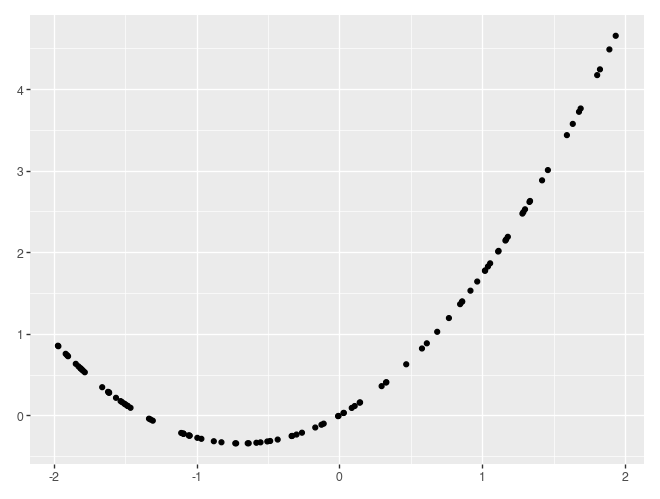

In [4]:
(p9.ggplot() + p9.geom_point(p9.aes(x, f1)))

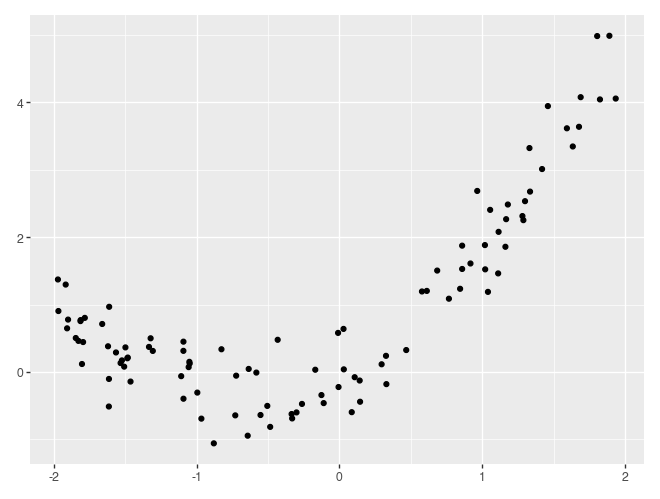

In [5]:
(p9.ggplot() + p9.geom_point(p9.aes(x, y)))

In [6]:
model = ptm.LocScalePTM.new_gaussian(y)
xvar = lsl.Var.new_obs(x, name="x")

ps_basis = ps(xvar, nbases=20, constraint="constant_and_linear")
lin_basis = lin(xvar)

model.loc += term.f_ig(ps_basis, fname="s")
model.loc += term.f(lin_basis, fname="lin")

In [7]:
model.build()

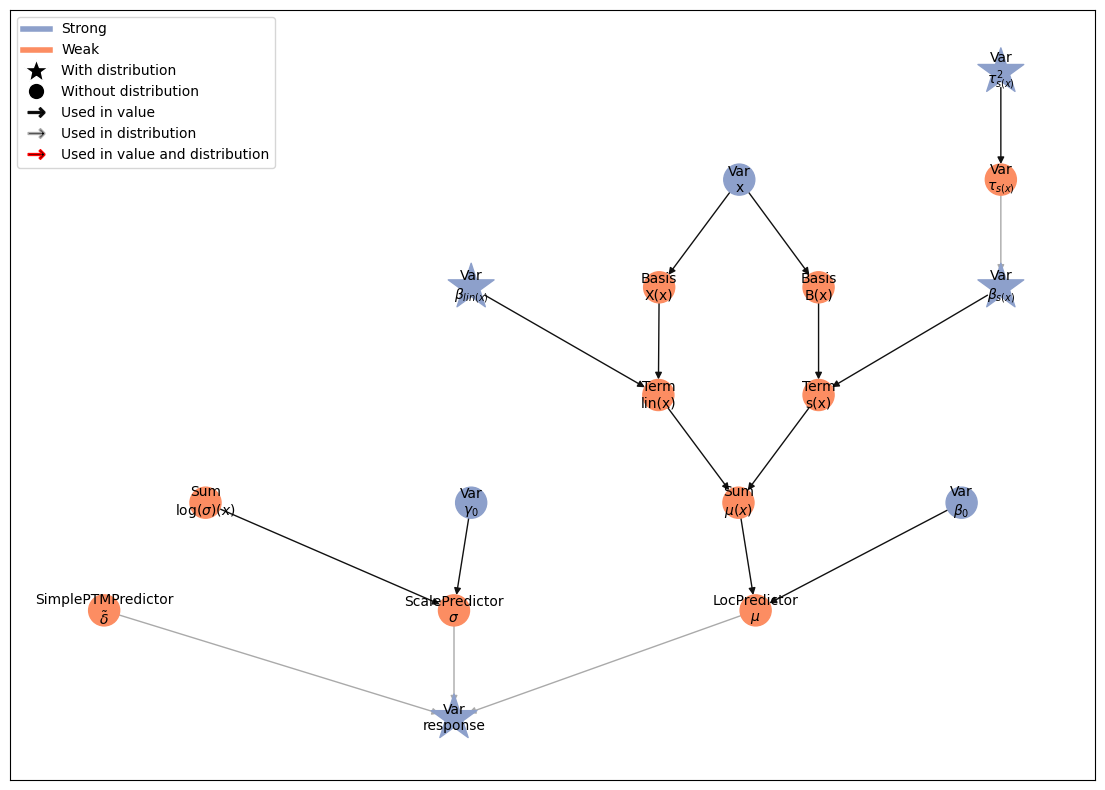

In [8]:
model.graph.plot_vars()

In [9]:
results = model.run_mcmc(
    seed=1,
    warmup=1000,
    posterior=2000,
    thinning_posterior=5,
    num_chains=4,
    warm_start=True,
)

liesel.goose.builder - WARNING - No jitter functions provided. The initial values won't be jittered
liesel.goose.engine - INFO - Initializing kernels...
liesel.goose.engine - INFO - Done
liesel.goose.engine - INFO - Starting epoch: FAST_ADAPTATION, 250 transitions, 25 jitted together
100%|████████████████████████████████████████| 10/10 [00:03<00:00,  2.69chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 25 transitions, 25 jitted together
100%|████████████████████████████████████████| 1/1 [00:00<00:00, 1057.30chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 50 transitions, 25 jitted together
100%|████████████████████████████████████████| 2/2 [00:00<00:00, 1303.79chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 100 transitions, 25 jitted together
100%|█████████████████████████████████████████| 

In [10]:
gs.Summary(results)

Parameter summary:

                           kernel      mean        sd    q_0.05     q_0.5  \
parameter        index                                                      
$\beta_0$        ()     kernel_04  1.079698  0.041096  1.012819  1.078744   
$\beta_{lin(x)}$ (0,)   kernel_01  0.814370  0.032450  0.763813  0.813664   
$\beta_{s(x)}$   (0,)   kernel_02  0.069379  0.004277  0.062474  0.069357   
                 (1,)   kernel_02  0.013033  0.061266 -0.080945  0.013341   
                 (2,)   kernel_02  0.002003  0.021616 -0.034120  0.002548   
                 (3,)   kernel_02  0.009255  0.054625 -0.076859  0.007348   
                 (4,)   kernel_02 -0.032693  0.054051 -0.126703 -0.031307   
                 (5,)   kernel_02  0.032055  0.057128 -0.060000  0.031157   
                 (6,)   kernel_02 -0.052058  0.061628 -0.162110 -0.046575   
                 (7,)   kernel_02  0.037232  0.061542 -0.058424  0.032888   
                 (8,)   kernel_02 -0.027547  0.050359 -0.112532 -0.026795   
                 (9,)   kernel_02 -0.042930  0.050727 -0.129783 -0.041103   
                 (10,)  kernel_02  0.053387  0.062633 -0.041050  0.051039   
                 (11,)  kernel_02 -0.070355  0.046015 -0.149112 -0.069596   
                 (12,)  kernel_02  0.167586  0.067137  0.063887  0.166657   
                 (13,)  kernel_02 -0.226914  0.055500 -0.319235 -0.227750   
                 (14,)  kernel_02  0.368768  0.083225  0.232165  0.369055   
                 (15,)  kernel_02 -0.527867  0.092737 -0.677360 -0.526035   
                 (16,)  kernel_02  1.046071  0.220037  0.684351  1.047047   
                 (17,)  kernel_02 -0.451087  0.160550 -0.725029 -0.447954   
$\gamma_0$       ()     kernel_00 -0.919217  0.076417 -1.042015 -0.920317   
$\tau^2_{s(x)}$  ()     kernel_03  0.003948  0.003123  0.001357  0.003072   

                          q_0.95  sample_size     ess_bulk     ess_tail  \
parameter        index                                                    
$\beta_0$        ()     1.147659         1600  1422.457340  1441.103809   
$\beta_{lin(x)}$ (0,)   0.867968         1600  1504.489245  1263.356408   
$\beta_{s(x)}$   (0,)   0.076633         1600  1276.296850  1482.771415   
                 (1,)   0.112300         1600  1257.290347  1099.948573   
                 (2,)   0.036265         1600  1355.938629  1335.718771   
                 (3,)   0.098189         1600  1112.931000  1198.233345   
                 (4,)   0.052858         1600  1338.059175  1266.895447   
                 (5,)   0.128185         1600  1303.030951  1271.717481   
                 (6,)   0.038868         1600   961.876123  1118.225105   
                 (7,)   0.148933         1600  1132.628890  1225.448913   
                 (8,)   0.053578         1600  1164.604359  1349.420480   
                 (9,)   0.039507         1600  1335.524789  1396.857727   
                 (10,)  0.159596         1600  1084.487981  1159.925157   
                 (11,)  0.004864         1600  1278.922419  1375.201874   
                 (12,)  0.276324         1600  1481.077058  1063.212255   
                 (13,) -0.137196         1600  1392.852032  1382.304780   
                 (14,)  0.505283         1600  1298.617013  1108.115021   
                 (15,) -0.379849         1600  1373.737807  1218.550791   
                 (16,)  1.406608         1600  1395.423185  1192.951719   
                 (17,) -0.195125         1600  1181.073369  1205.248234   
$\gamma_0$       ()    -0.792855         1600  1496.031789  1446.839877   
$\tau^2_{s(x)}$  ()     0.009544         1600   529.613400   764.324187   

                            rhat  
parameter        index            
$\beta_0$        ()     1.000111  
$\beta_{lin(x)}$ (0,)   1.003674  
$\beta_{s(x)}$   (0,)   1.002410  
                 (1,)   0.998971  
                 (2,)   1.002013  
                 (3,)   1.001115  
                 (4,)   1.004050  
               

In [19]:
samples = results.get_posterior_samples()

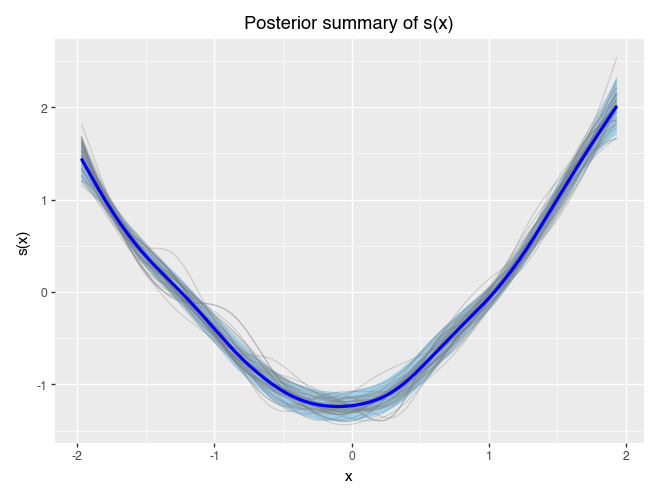

In [24]:
ptm.plot_term(model.graph.vars["s(x)"], samples)

In [21]:
pred = model.graph.predict(samples, predict=["s(x)", "$\\mu$", "lin(x)"])
pred_summary = gs.SamplesSummary(pred).to_dataframe()
pred_summary["x"] = jnp.tile(x, len(pred))
pred_long = pred_summary.reset_index()[["variable", "mean", "x"]].melt(
    id_vars=["x", "variable"], var_name="which"
)
pred_long

,x,variable,which,value
0,-1.970825,$\mu$,mean,0.917815
1,-1.916435,$\mu$,mean,0.817550
2,0.325706,$\mu$,mean,0.291344
3,-0.552648,$\mu$,mean,-0.394615
4,-1.107849,$\mu$,mean,-0.041821
...,...,...,...,...
295,1.018196,s(x),mean,-0.038372
296,-0.994934,s(x),mean,-0.408260
297,0.328362,s(x),mean,-1.050850
298,-1.614257,s(x),mean,0.592374


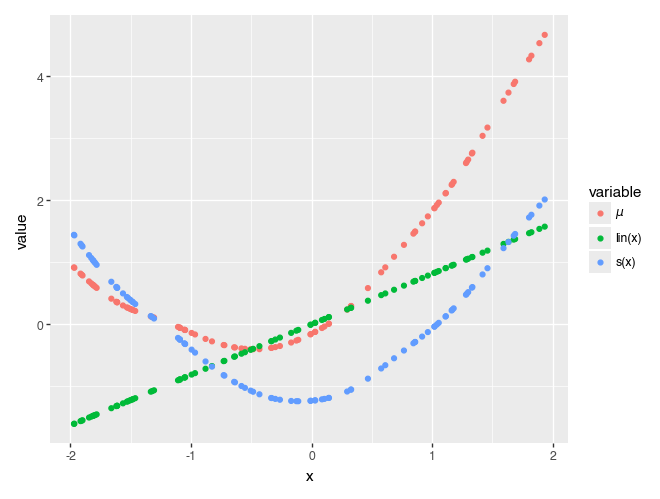

In [22]:
(p9.ggplot(pred_long) + p9.geom_point(p9.aes("x", "value", color="variable")))